## Univariant Plot
- A plot that only depends on one variable
- The plots done before were `bivariant`, depending or comparing between 2 things

### Distribution Plot
- Gives us the idea of the distribution of the data in a particular column
- If `KDE` is True (Default), then sns uses something called a *Kernel Distribution Estimation* to predict a distribution plot for our data

In [1]:
import seaborn as sns

In [2]:
tips_data = sns.load_dataset("tips")
tips_data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


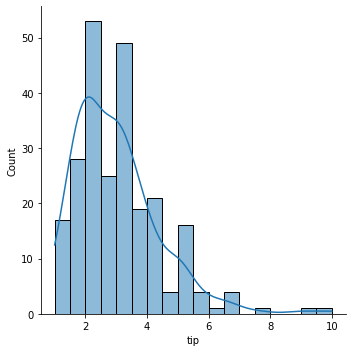

In [4]:
sns.displot(tips_data['tip'], kde=True)

The background plot is just the count plot like a histogram, but the line over the plot, is the predicted distribution function computed using KDE

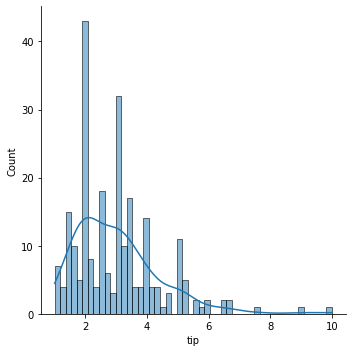

In [6]:
# To get more precise counts, we can increase bins
sns.displot(tips_data['tip'], kde=True, bins=50)

We see our plot increase the number of values, this can be handled using the `bins` parameter

### KDE plot
- Kernel Density Estimation
- If we dont know the underlying distribution, this plot tries to plot a continous density function as close to a normal distribution as possible

<AxesSubplot:xlabel='tip', ylabel='Density'>

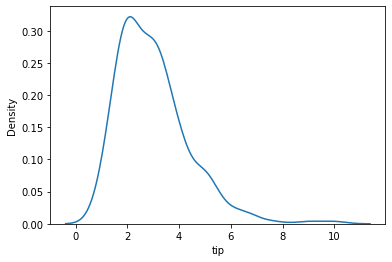

In [7]:
sns.kdeplot(tips_data["tip"])

### Joint Plot
- Shows both `univariant` and `bivariant` plots
- Bivariant as a scatter plot, between the 2 things given
- Univariant as a histogram of count on both the axes

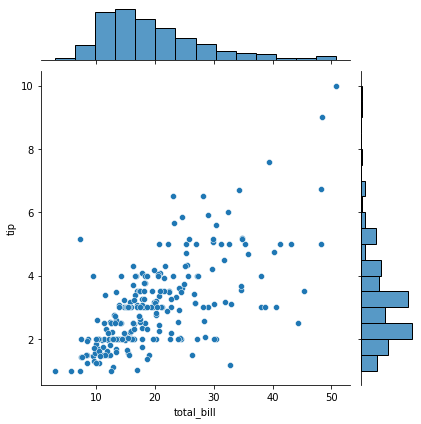

In [9]:
sns.jointplot(x="total_bill", y="tip", data=tips_data)

Here we see a comparative scatter plot and then 2 histograms for both the axes

The `kind` argument lets us plot different types of plots for better estimation

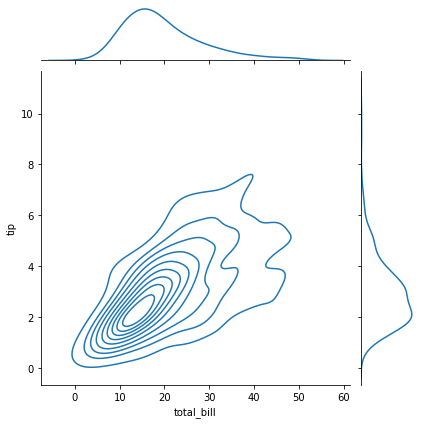

In [12]:
sns.jointplot(x="total_bill", y="tip", data=tips_data, kind="kde")

The center is more of a `2D KDE` where the peak is in the center of the smallest circle

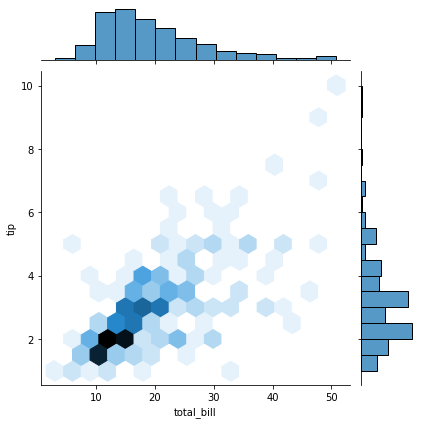

In [13]:
sns.jointplot(x="total_bill", y="tip", data=tips_data, kind="hex")

The hex plot shows the density at different point by the color density at that point

### Pair Plot
- Plots all the numeric features against all the others
- Provides a correlation plot, just like the matrix by pandas

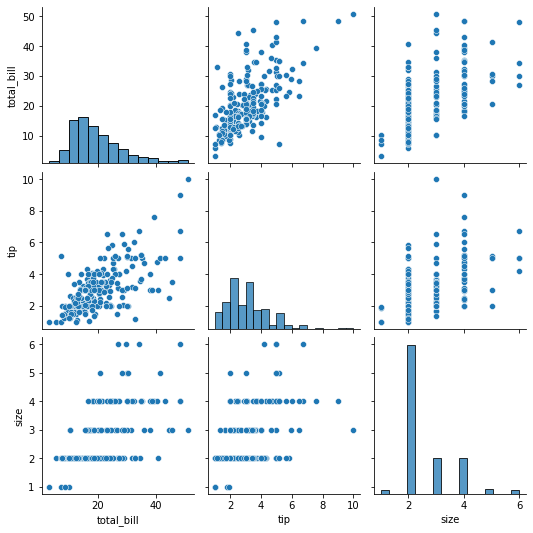

In [14]:
sns.pairplot(tips_data)

We can see, the diagonals are just plotted with distplot, cause they are essentially univariant

We can also use `hue` for comparison

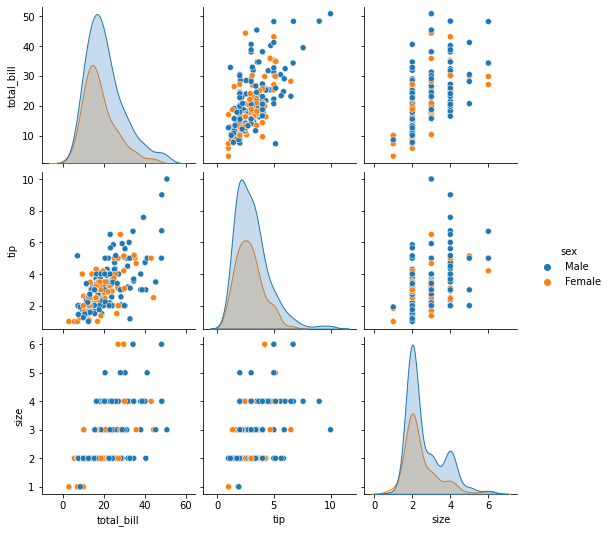

In [15]:
sns.pairplot(tips_data, hue="sex")

Here we get all the plots, but further segregated on sex

### Heatmap
- A comparative plot which assigns color depending on a gradient so that we can see how the data is distributed
- Another use case can be visualising the correlation to pick out the effective features to study

In [16]:
tips_coor = tips_data.corr()
tips_coor

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

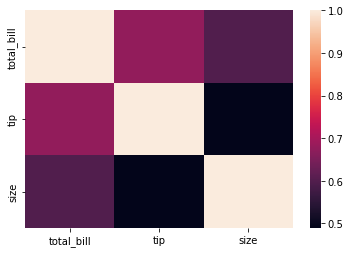

In [17]:
sns.heatmap(tips_coor)

Here we can see that the diagonal is complete 1, as the correlation between the same features is max, and there is almost nill corr between size and tip

For showing the heatmap of data distrubution, we use another dataset:

In [18]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


#### `pivottable`
- This feature of sns, allows us to alter the dataset to our preferred usecase

In [19]:
flights_pivot = flights.pivot_table(index="month", columns="year", values="passengers")
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


We have created a 2D dataset using the given dataset to make a more informative table, to show passengers across years and months

To check the data distribution:

<AxesSubplot:xlabel='year', ylabel='month'>

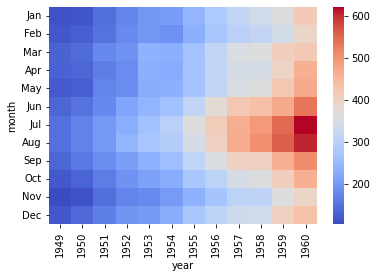

In [20]:
sns.heatmap(flights_pivot, cmap="coolwarm")

As we can see we see a nice gradient from $1949$ to $1960$ as the flights increased
Also a gradient can be seen in the months, July and Auguest being the most preferred months for air travel